# Basic Analysis

## Data Loading

In [2]:
import pandas as pd


In [3]:
df = pd.read_csv("./Data/data.csv")

In [528]:
df.head()

,id,article,text,Unnamed: 3
0,1,Gaza aid ship to dock in Egypt after Israel pr...,A ship with supplies for Gaza will dock at el-...,NaN
1,2,Mel Gibson,Often acts and directs stories involving an in...,NaN
2,3,Talent Agency WME drops Mel Gibson,Cast member Mel Gibson (R) and Oksana Grigorie...,NaN
3,4,Suicide bomber killed in Tehran-Fars,"(Adds details) TEHRAN, June 20 (Reuters) - A s...",NaN
4,5,Iran's 10% ballot boxes to be recounted,Tehran - Iran's Guardian Council is ready to r...,NaN


In [529]:
len(df)

3000

In [530]:
labels = df["article"].tolist()
labels[:10]

['Gaza aid ship to dock in Egypt after Israel pressure',
 'Mel Gibson',
 'Talent Agency WME drops Mel Gibson',
 'Suicide bomber killed in Tehran-Fars',
 "Iran's 10% ballot boxes to be recounted",
 "Iran's Mousavi renews call for cancellation of election result",
 'Relatives of disgraced Savile voice their anguish',
 'Iran to recount 10 percent of ballot boxes',
 'US admits Afghan airstrike errors',
 "Jimmy Savile nephew 'devastated' by sex abuse scandal"]

In [531]:
documents = df['text'].tolist()
corpus = " ".join(documents).lower()

In [532]:
corpus[:1000]

'a ship with supplies for gaza will dock at el-arish in egypt, officials say, after israeli pressure to stop the vessel breaking its gaza blockade. the moldovan-flagged ship chartered by a charity run by the son of libyan leader col muammar gaddafi, left a greek port on saturday. israel asked for help from the un, and had talks with greece and moldova. but organisers insist they will go to gaza. an israeli raid on a gaza-bound ship in may killed nine turkish activists. israel insisted its troops were defending themselves but the raid sparked international condemnation. israel recently eased its blockade, allowing in almost all consumer goods but maintaining a "blacklist" of some items. israel says its blockade of the palestinian territory is needed to prevent the supply of weapons to the hamas militant group which controls gaza. the amalthea, renamed hope for the mission, set off from the greek port of lavrio, loaded with about 2,000 tonnes of food, cooking oil, medicines and pre-fabri

## Data cleaning

In [535]:
import string

def clean_text(corpus):
    # Remove punctuations from the corpus
    translator = str.maketrans('', '', string.punctuation)
    corpus = corpus.translate(translator)

    # Remove digits from the corpus
    remove_digits = str.maketrans('', '', string.digits)
    corpus = corpus.translate(remove_digits)
    return corpus

corpus = clean_text(corpus=corpus)
corpus[:1000]

'a ship with supplies for gaza will dock at elarish in egypt officials say after israeli pressure to stop the vessel breaking its gaza blockade the moldovanflagged ship chartered by a charity run by the son of libyan leader col muammar gaddafi left a greek port on saturday israel asked for help from the un and had talks with greece and moldova but organisers insist they will go to gaza an israeli raid on a gazabound ship in may killed nine turkish activists israel insisted its troops were defending themselves but the raid sparked international condemnation israel recently eased its blockade allowing in almost all consumer goods but maintaining a blacklist of some items israel says its blockade of the palestinian territory is needed to prevent the supply of weapons to the hamas militant group which controls gaza the amalthea renamed hope for the mission set off from the greek port of lavrio loaded with about  tonnes of food cooking oil medicines and prefabricated houses it has been char

We can observe the changes

In [8]:
corpus[:1000]

'a ship with supplies for gaza will dock at elarish in egypt officials say after israeli pressure to stop the vessel breaking its gaza blockade the moldovanflagged ship chartered by a charity run by the son of libyan leader col muammar gaddafi left a greek port on saturday israel asked for help from the un and had talks with greece and moldova but organisers insist they will go to gaza an israeli raid on a gazabound ship in may killed nine turkish activists israel insisted its troops were defending themselves but the raid sparked international condemnation israel recently eased its blockade allowing in almost all consumer goods but maintaining a blacklist of some items israel says its blockade of the palestinian territory is needed to prevent the supply of weapons to the hamas militant group which controls gaza the amalthea renamed hope for the mission set off from the greek port of lavrio loaded with about  tonnes of food cooking oil medicines and prefabricated houses it has been char

## Data Analysis


In [9]:
import spacy

nlp = spacy.load('en_core_web_sm')



In [10]:
# Finding size ofnlp.max_length_length w.r.t max_length of spacy model
len(corpus) / nlp.max_length

5.322769

Since the length of text of the corpus is greater than that of max length, we will be splitting the corpus into six parts. Since ration is 5.5133356 , the first five chunks will be of size of max length and remaining text will be the sixth chunk

In [11]:
# Spliting corpus to match the max length of spacy
corpus_chunk = [corpus[i:i+nlp.max_length] for i in range (0,len(corpus), nlp.max_length)]
    

We know parse each chunk of corpus with spacy

In [12]:
docs = []
for chunk in corpus_chunk:
    doc = nlp(chunk)
    docs.append(doc)

Using the parsed data we can now find nouns, verbs , organizations and people from our text corpus

In [467]:
words = []
nouns = []
verbs = []
people = []
orgs = []

In [468]:
# Finding words, verbs and nouns
for doc in docs:
    for token in doc:
        words.append(token.text)
        if token.pos_ == "VERB":
            verbs.append(token.text)
            
        if token.pos_ == "NOUN":
            nouns.append(token.text)
        


In [469]:
# Finding organizations and people
for doc in docs:
    for ent in doc.ents:
        if ent.label_ == "ORG":
            orgs.append(ent.text)
        if ent.label_ == "PERSON":
            people.append(ent.text)

In [470]:
print("Total words: ", len(words))
print("Total verbs: ", len(verbs))
print("Total nouns: ", len(nouns))
print("Total people: ", len(people))
print("Total organizations: ", len(orgs))

Total words:  902861
Total verbs:  174605
Total nouns:  281149
Total people:  286
Total organizations:  996


We will now find the frequency of words 

In [471]:
from collections import Counter
from collections import OrderedDict

def sort_by_frequency(data,reverse = True):
    """ 
    Function to sord the data by its frequency
    Returns ordered dictionary
    Default: Sort in descending order
        
    """
    data_with_freq = dict(Counter(data))
    data_sorted_by_freq = OrderedDict(sorted(data_with_freq.items(), key=lambda x: x[1],reverse=reverse))
    
    return data_sorted_by_freq





Sorting the words based on frequency

In [472]:
words_frequency = sort_by_frequency(words)
nouns_frequency = sort_by_frequency(nouns)
verbs_frequency  = sort_by_frequency(verbs)
people_frequency = sort_by_frequency(people)
orgs_frequency = sort_by_frequency(orgs)

We can observe that stop words like "the", "of","to","a","in" etc occurs most often in our corpus . 

In [473]:
words_frequency

OrderedDict([('the', 63205),
             ('of', 25481),
             ('to', 23611),
             ('in', 23224),
             ('a', 20047),
             ('and', 19875),
             (' ', 15680),
             ('said', 9870),
             ('on', 9036),
             ('that', 7751),
             ('for', 7128),
             ('was', 6974),
             ('is', 6188),
             ('by', 5432),
             ('have', 5197),
             ('he', 5060),
             ('at', 5018),
             ('with', 5015),
             ('has', 4981),
             ('as', 4950),
             ('were', 4900),
             ('it', 4881),
             ('from', 4559),
             ('been', 4024),
             ('had', 3780),
             ('an', 3710),
             ('be', 3666),
             ('are', 3579),
             ('people', 3314),
             ('but', 3153),
             ('not', 3076),
             ('his', 2861),
             ('after', 2741),
             ('they', 2708),
             ('us', 2620),
             ('wi

# N-gram analysis

We will use nltk to find bigrams of our corpus

In [474]:
import nltk

def create_bigram(tokens):
    # Using words token generated from spacy to find bigram
    bigrams_ = nltk.bigrams(tokens)
    # Convert generator into list of tuples of bigram 
    return list(bigrams_)

In [475]:
bigrams_list = create_bigram(words)
bigrams = [" ".join(bigram) for bigram in list(bigrams_list)]

In [476]:
bigrams[:10]

['a ship',
 'ship with',
 'with supplies',
 'supplies for',
 'for gaza',
 'gaza will',
 'will dock',
 'dock at',
 'at elarish',
 'elarish in']

In [477]:
# Sorting bigram by frequency
bigram_frequency = sort_by_frequency(bigrams)


We can observe bigram_frequency 

In [478]:
def get_top_n_from_order_dict(ordered_dict,n):
    """ Function to find n top object from ordered dictionary"""
    return [list(ordered_dict.items())[i] for i in range(n)]

In [479]:
# Finding top 25 bigram
top_bigram = get_top_n_from_order_dict(bigram_frequency,25)
top_bigram

[('of the', 6618),
 ('in the', 6262),
 ('to the', 2758),
 ('on the', 1852),
 ('said the', 1850),
 ('in a', 1843),
 ('for the', 1731),
 ('and the', 1457),
 ('have been', 1449),
 ('at the', 1433),
 ('from the', 1430),
 ('by the', 1316),
 ('that the', 1250),
 ('to be', 1244),
 ('he said', 1160),
 ('  people', 1158),
 ('has been', 1041),
 ('with the', 1009),
 ('had been', 1005),
 ('of a', 974),
 ('the us', 954),
 ('more than', 947),
 ('in  ', 919),
 ('at least', 900),
 ('it was', 757)]

We can visualize the top bigram as barplots in following way

In [480]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_list_of_tuple(data):
    """"""
    list1, list2 = zip(*data)
    y_pos = np.arange(len(list1))
    plt.barh(y_pos, list2, align='center', alpha=0.5)
    plt.yticks(y_pos, list1)
    plt.show()

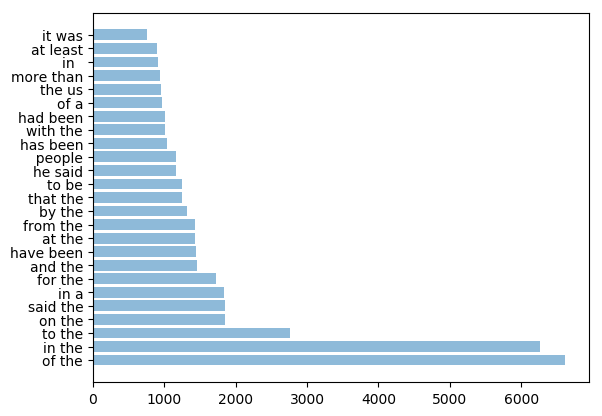

In [481]:
visualize_list_of_tuple(top_bigram)

Finding unique nouns, verbs, people name and organization name in our text corpus

In [482]:
unique_nouns = set(nouns)
unique_verbs = set(verbs)
unique_people = set(people)
unique_orgs = set(orgs)            

In [485]:
unique_people

{'\n  ',
 ' ',
 '  ',
 '   bin laden',
 ' mm',
 'al',
 'al alawi',
 'al jabari',
 'al jalaa',
 'al roweni',
 'al tirawi',
 'bin',
 'bin jassim bin jabr',
 'bin laden',
 'bin laden  al qaedas',
 'bin laden cbs',
 'bush',
 'clinton',
 'david de leon',
 'elizabeth',
 'eric',
 'eric woerth',
 'gilani',
 'gyanendra',
 'harding',
 'hu',
 'jack',
 'jocelyn',
 'juncker',
 'kelly',
 'kim',
 'mid',
 'mm',
 'morgan',
 's',
 'sharon',
 'van  ',
 'van de kiezers',
 'warren',
 'xherdan',
 'xynthia',
 'zacarias'}

In [486]:
# Both words Nouns
def get_noun_noun_bigram(bigrams):
    "Find bigram with both word noun"
    NN_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_nouns and second_word in unique_nouns:
            NN_bigrams.append(" ".join((first_word,second_word)))
    return NN_bigrams
NN_bigrams = get_noun_noun_bigram(bigrams_list)
NN_bigrams

['gaza will',
 'will dock',
 'egypt officials',
 'officials say',
 'israeli pressure',
 'gaza blockade',
 'charity run',
 'leader col',
 'col muammar',
 'muammar gaddafi',
 'gaddafi left',
 'greek port',
 'saturday israel',
 'israeli raid',
 'gazabound ship',
 'turkish activists',
 'activists israel',
 'international condemnation',
 'condemnation israel',
 'blockade allowing',
 'consumer goods',
 'items israel',
 'israel says',
 'palestinian territory',
 'hamas militant',
 'militant group',
 'controls gaza',
 'mission set',
 'greek port',
 'food cooking',
 'cooking oil',
 'oil medicines',
 'gaddafi international',
 'international charity',
 'development foundation',
 'saif alislam',
 'alislam gaddafi',
 'm ft',
 'ft vessel',
 'supporters who',
 'palestinian people',
 'individual who',
 'weapon film',
 'film series',
 'patriot signs',
 'men who',
 'who seek',
 'seek revenge',
 'empire uk',
 'uk magazines',
 'movie stars',
 'time list',
 'list october',
 'people usa',
 'usa magazine',
 '

In [487]:
# First word verb
def get_bigram_starting_with_verb(bigrams):
    V_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_verbs:
            V_bigrams.append(" ".join((first_word,second_word)))
            
    return V_bigrams
V_bigrams = get_bigram_starting_with_verb(bigrams_list)
V_bigrams

['ship with',
 'supplies for',
 'gaza will',
 'will dock',
 'dock at',
 'egypt officials',
 'say after',
 'pressure to',
 'stop the',
 'breaking its',
 'gaza blockade',
 'blockade the',
 'moldovanflagged ship',
 'ship chartered',
 'chartered by',
 'run by',
 'libyan leader',
 'leader col',
 'muammar gaddafi',
 'gaddafi left',
 'left a',
 'saturday israel',
 'israel asked',
 'asked for',
 'help from',
 'un and',
 'had talks',
 'talks with',
 'insist they',
 'will go',
 'go to',
 'gaza an',
 'raid on',
 'ship in',
 'may killed',
 'killed nine',
 'turkish activists',
 'israel insisted',
 'insisted its',
 'troops were',
 'were defending',
 'defending themselves',
 'raid sparked',
 'sparked international',
 'israel recently',
 'eased its',
 'blockade allowing',
 'allowing in',
 'maintaining a',
 'israel says',
 'says its',
 'blockade of',
 'territory is',
 'is needed',
 'needed to',
 'prevent the',
 'supply of',
 'hamas militant',
 'controls gaza',
 'gaza the',
 'renamed hope',
 'hope for',

In [488]:
# First word organization 
def get_bigram_starting_with_organization(bigrams):
    org_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_orgs:
            org_bigrams.append(" ".join((first_word,second_word)))
    return org_bigrams
org_bigrams = get_bigram_starting_with_organization(bigrams_list)
org_bigrams

['un and',
 'hamas militant',
 '  tonnes',
 '  in',
 '  movie',
 '  chosen',
 '  most',
 '  most',
 '  most',
 '   earlier',
 '  and',
 '  years',
 '  reuters',
 '  a',
 '  irans',
 '  percent',
 'state television',
 '  percent',
 '  xinhua',
 '  irans',
 '  irans',
 '  percent',
 '  presidential',
 '  percent',
 '  who',
 '  in',
 '  and',
 '  victims',
 '  and',
 '  percent',
 'state television',
 '  percent',
 '  election',
 'state media',
 '  for',
 '  for',
 '  may',
 '  civilians',
 '  civilians',
 'pentagon has',
 '  as',
 '  but',
 '  civilian',
 '  people',
 '  separately',
 '  he',
 '  dead',
 '  and',
 '  he',
 '  he',
 '  soldiers',
 '  whose',
 '  for',
 '  young',
 '  on',
 '  lines',
 '  which',
 '  abused',
 '  a',
 '  told',
 'state in',
 '  of',
 'state jon',
 'state next',
 '   this',
 '  to',
 'state endorsed',
 '  he',
 'state over',
 '  is',
 '  or',
 '  the',
 'state which',
 '   polish',
 '  in',
 'al qaeda',
 'state analysts',
 'al qaeda',
 '  will',
 '  after'

In [489]:
# First word organization 
def get_bigram_starting_with_person(bigrams):
    people_bigrams = []
    for first_word,second_word in bigrams:
        if first_word in unique_people:
            people_bigrams.append(" ".join((first_word,second_word)))
    return people_bigrams
people_bigrams = get_bigram_starting_with_person(bigrams_list)
people_bigrams

['  tonnes',
 '  in',
 '  movie',
 '  chosen',
 '  most',
 '  most',
 '  most',
 'mid he',
 '   earlier',
 '  and',
 '  years',
 '  reuters',
 '  a',
 '  irans',
 '  percent',
 '  percent',
 '  xinhua',
 '  irans',
 '  irans',
 '  percent',
 '  presidential',
 '  percent',
 '  who',
 '  in',
 '  and',
 '  victims',
 '  and',
 '  percent',
 '  percent',
 '  election',
 '  for',
 '  for',
 '  may',
 '  civilians',
 '  civilians',
 '  as',
 '  but',
 '  civilian',
 '  people',
 '  separately',
 '  he',
 '  dead',
 'bush mr',
 'bush and',
 'bush administration',
 'bush is',
 'bush soon',
 '  and',
 '  he',
 '  he',
 'bush on',
 's going',
 'bush well',
 '  soldiers',
 '  whose',
 '  for',
 '  young',
 's in',
 '  on',
 '  lines',
 '  which',
 '  abused',
 '  a',
 '  told',
 's mitt',
 '  of',
 's doing',
 's not',
 '   this',
 '  to',
 '  he',
 '  is',
 's he',
 '  or',
 '  the',
 '   polish',
 '  in',
 'al qaeda',
 'al qaeda',
 '  will',
 '  after',
 '  killing',
 '  people',
 'al qaeda',

Sort by frequency

In [490]:
NN_bigrams_frequency = sort_by_frequency(NN_bigrams)
V_bigrams_frequency  = sort_by_frequency(V_bigrams)
people_bigrams_frequency = sort_by_frequency(people_bigrams)
org_bigrams_frequency = sort_by_frequency(org_bigrams)

In [491]:
NN_bigrams_frequency

OrderedDict([('news agency', 488),
             ('united states', 424),
             ('human rights', 346),
             ('security forces', 346),
             ('united nations', 201),
             ('security council', 197),
             ('north korea', 160),
             ('white house', 159),
             ('officials say', 158),
             ('death toll', 152),
             ('javascript media', 148),
             ('barack obama', 141),
             ('gaza strip', 138),
             ('president bashar', 137),
             ('president barack', 122),
             ('people who', 121),
             ('set up', 119),
             ('world cup', 119),
             ('news conference', 115),
             ('un security', 102),
             ('afp news', 94),
             ('bashar alassad', 93),
             ('reuters news', 90),
             ('middle east', 90),
             ('bin laden', 90),
             ('correspondent says', 90),
             ('government forces', 90),
             ('european

In [492]:
V_bigrams_frequency


OrderedDict([('said the', 1850),
             ('have been', 1449),
             ('has been', 1041),
             ('had been', 1005),
             ('will be', 663),
             ('according to', 622),
             ('said he', 572),
             ('said it', 568),
             ('told the', 560),
             ('were killed', 500),
             ('killed in', 486),
             ('said in', 483),
             ('is a', 480),
             ('said that', 473),
             ('would be', 424),
             ('united states', 424),
             ('is the', 399),
             ('was a', 379),
             ('been killed', 339),
             ('did not', 336),
             ('says the', 320),
             ('is not', 307),
             ('hundreds of', 301),
             ('expected to', 290),
             ('was the', 285),
             ('said they', 253),
             ('was not', 251),
             ('said on', 250),
             ('trying to', 249),
             ('head of', 240),
             ('said a', 238),


Finding top 25 bigram with both nouns

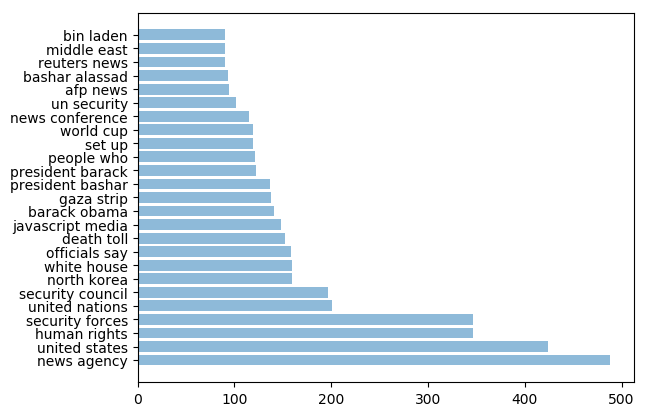

In [493]:
top_25_NN_bigram = get_top_n_from_order_dict(NN_bigrams_frequency,25)
visualize_list_of_tuple(top_25_NN_bigram)

# Document Clustering

Cleaning each text of the corpus before clustering

In [538]:
cleaned_documents = []
for document in documents:
    document = clean_text(document).lower()
    cleaned_documents.append(document)
documents = cleaned_documents
documents[0]

'a ship with supplies for gaza will dock at elarish in egypt officials say after israeli pressure to stop the vessel breaking its gaza blockade the moldovanflagged ship chartered by a charity run by the son of libyan leader col muammar gaddafi left a greek port on saturday israel asked for help from the un and had talks with greece and moldova but organisers insist they will go to gaza an israeli raid on a gazabound ship in may killed nine turkish activists israel insisted its troops were defending themselves but the raid sparked international condemnation israel recently eased its blockade allowing in almost all consumer goods but maintaining a blacklist of some items israel says its blockade of the palestinian territory is needed to prevent the supply of weapons to the hamas militant group which controls gaza the amalthea renamed hope for the mission set off from the greek port of lavrio loaded with about  tonnes of food cooking oil medicines and prefabricated houses it has been char

In [414]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import time
from sklearn.cluster import KMeans


In [539]:
class DocumentCluster:
    """Class to cluster document"""
    def __init__(self,model,data,labels):
        self.model = model
        self.data = data
        self.labels = labels
        self.model_name = self._get_model_name()
        
        self.cluster_pipeline = None
        
    
    def _get_model_name(self):
        """Get name of model being used"""
        model_name = str(self.model).split('(')[0]
        return model_name
            

    
    def train_model(self,ngram,use_idf):
        """ 
            Train model
            ngram: int
            use_idf: bool
            analyzer: string
        
        """
        current_time = time.time()
        self._ngram = ngram
        self._use_idf = use_idf
        
        # Set a pipeline
        # 1. The first step of the pipeline is to find count vectorizer
        # Countvectorizer converts a collection of text documents to a matrix of token counts
        # This implementation produces a sparse representation of the counts
        # 2. We then use TfidfTransformr
        # TfidfTransformer transforms a count matrix to a normalized tf or tf-idf representation
        # Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency

        self.cluster_pipeline = Pipeline([('vect', CountVectorizer(ngram_range=(1,ngram), 
                analyzer="word")), ('tfidf', TfidfTransformer(use_idf=use_idf)), 
                ('model', self.model)])
        self._cluster = self.cluster_pipeline.fit(self.data)
        
        self._train_time = time.time() - current_time
        
        
        print("Training completed")
        print("Training time for {} : {} secs".format(self.model_name, self._train_time))
        
    
    def predict(self):
        """
        Predict cluster id for all clusters
        """
        self.label_id_dict = {}
        self.document_id_dict = {}
        self.cluster_id = []
        for i, document in enumerate(self.data):
            cluster_id = self.cluster_pipeline.predict([document])[0]
            self.label_id_dict.update({self.labels[i]:cluster_id})
            self.document_id_dict.update({document:cluster_id})
            self.cluster_id.append(cluster_id)
        
        return self.label_id_dict, self.document_id_dict
            
    
    
        

We will create kmeans clustering model with 5 clusters

In [540]:
cluster_number = 5

In [541]:
model = KMeans(n_clusters=cluster_number, init = "k-means++",max_iter=150,n_init=1)

In [542]:
doc_cluster = DocumentCluster(data=documents,model=model,labels=labels)

We will train our pipline now

In [543]:
doc_cluster.train_model(ngram=2, use_idf=True)

Training completed
Training time for KMeans : 30.627986907958984 secs


We will use predict method from our DocumentCluster class

In [544]:
result_label, result_docs = doc_cluster.predict()

We can observe the cluster id of each label

In [545]:
result_label

{'Gaza aid ship to dock in Egypt after Israel pressure': 2,
 'Mel Gibson': 1,
 'Talent Agency WME drops Mel Gibson': 1,
 'Suicide bomber killed in Tehran-Fars': 1,
 "Iran's 10% ballot boxes to be recounted": 3,
 "Iran's Mousavi renews call for cancellation of election result": 3,
 'Relatives of disgraced Savile voice their anguish': 4,
 'Iran to recount 10 percent of ballot boxes': 3,
 'US admits Afghan airstrike errors': 4,
 "Jimmy Savile nephew 'devastated' by sex abuse scandal": 1,
 "Many dead' in US strike in Iraq": 1,
 'I tried repeatedly to talk the US out of invading Iraq, says Berlusconi': 4,
 'Jimmy Savile: Gary Glitter arrested over sex offences': 1,
 'Source: Jon Huntsman to drop out of presidential race': 3,
 'Republican primaries: Jon Huntsman to end bid': 3,
 'NATO-Russia drill aims to prevent September 11 attack': 1,
 'Al Qaeda leader calls for kidnapping of Westerners': 1,
 'Palestinians killed in air strike': 2,
 "Pakistan v Sri Lanka, ICC World Twenty20 final, Lord's 

The ordered list of cluster id can be retrieved as

In [546]:
doc_cluster.cluster_id

[2,
 1,
 1,
 1,
 3,
 3,
 4,
 3,
 4,
 1,
 1,
 4,
 1,
 3,
 3,
 1,
 1,
 2,
 4,
 3,
 1,
 1,
 0,
 1,
 4,
 3,
 1,
 1,
 1,
 4,
 4,
 2,
 0,
 2,
 1,
 4,
 4,
 4,
 1,
 0,
 1,
 4,
 1,
 1,
 1,
 4,
 3,
 0,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 4,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 4,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 4,
 4,
 1,
 1,
 1,
 2,
 1,
 4,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 3,
 3,
 1,
 1,
 4,
 1,
 1,
 0,
 1,
 1,
 4,
 4,
 1,
 4,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 4,
 1,
 0,
 4,
 4,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 3,
 1,
 3,
 4,
 0,
 3,
 0,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 4,
 0,
 3,
 0,
 1,
 1,
 1,
 4,
 1,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 1,
 1,
 1,
 1,
 3,
 1,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 3,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 4,
 1,
 4,
 1,
 0,
 0,
 1,


We will now separate text clusters into different corpus for further analysis

In [547]:
clusters_text = []
for i in range(5):
    text = " ".join([k for k,v in result_docs.items() if v == i])
    clusters_text.append(text)

In [549]:
clusters_text[0]

'two car bombings in damascus have killed at least  people syrian state media report on the fourth day of a supposed ceasefire women and children were among the victims of the two attacks in the south of the city state tv reported earlier activists said government jets had bombed the citys harasta district un envoy lakhdar brahimi who brokered the truce over the islamic holiday of eid aladha said he regretted that both sides were not complying with it the situation is bad and getting worse he told reporters in moscow after talks with russian foreign minister sergei lavrov but mr brahimi nevertheless insisted that he would not be discouraged by the apparent failure of his initiative which he had hoped would allow a political process to develop and lead to a permanent end to hostilities it will not discourage us because syria is very important and the people of syria deserve our support and interest he added we think this civil war must end and the new syria has to be built by all its so

Analysing bigrams of all the clusters

We will be taking only top 25 bigram of all clusters

In [637]:
def get_cluster_analysis_results(clusters_text):
    all_clusters = {}

    for i, corpus in enumerate(clusters_text):
        tokens = corpus.split()
        # Using words token generated from spacy to find bigram
        bigram_list = create_bigram(tokens)
        bigrams = [" ".join(bigram) for bigram in list(bigram_list)]
        bigram_frequency = sort_by_frequency(bigrams)
        top_bigrams = get_top_n_from_order_dict(bigram_frequency,25)

        # Finding bigrams with Both words Nouns
        NN_bigrams = get_noun_noun_bigram(bigram_list)
        NN_bigrams_frequency = sort_by_frequency(NN_bigrams)
        top_NN_bigrams = get_top_n_from_order_dict(NN_bigrams_frequency,25)

        # Finding bigram starting with verb
        V_bigrams = get_bigram_starting_with_verb(bigram_list)
        V_bigrams_frequency = sort_by_frequency(V_bigrams)
        top_V_bigrams = get_top_n_from_order_dict(V_bigrams_frequency,25)


        # Finding bigram starting with person name
        people_bigrams = get_bigram_starting_with_person(bigram_list)
        people_bigrams_frequency = sort_by_frequency(people_bigrams)
        top_people_bigrams = get_top_n_from_order_dict(people_bigrams_frequency,25)

        # Finding 
        org_bigrams = get_bigram_starting_with_organization(bigram_list)
        org_bigrams_frequency = sort_by_frequency(org_bigrams)
        top_org_bigrams = get_top_n_from_order_dict(org_bigrams_frequency,25)


        cluster_analysis_result = {"bigram_freq":top_bigrams,"noun_noun_bigram":top_NN_bigrams,
                                       "verb_bigram":top_V_bigrams, "people_bigram": top_people_bigrams,
                                       "organization_bigram":top_org_bigrams}
        all_clusters.update({i:cluster_analysis_result})
    
    return all_clusters

all_clusters = get_cluster_analysis_results(clusters_text=clusters_text)

We can access the analysis result in following way

In [638]:
cluster_id = 0
all_clusters[cluster_id]

{'bigram_freq': [('in the', 679),
  ('of the', 578),
  ('to the', 286),
  ('the syrian', 241),
  ('said the', 198),
  ('on the', 187),
  ('have been', 169),
  ('at least', 163),
  ('human rights', 159),
  ('in a', 147),
  ('from the', 133),
  ('for the', 132),
  ('by the', 124),
  ('and the', 124),
  ('president bashar', 124),
  ('in syria', 120),
  ('of a', 114),
  ('city of', 114),
  ('security forces', 113),
  ('were killed', 112),
  ('the government', 112),
  ('the city', 111),
  ('that the', 111),
  ('more than', 110),
  ('had been', 109)],
 'noun_noun_bigram': [('human rights', 159),
  ('president bashar', 124),
  ('security forces', 113),
  ('bashar alassad', 83),
  ('news agency', 78),
  ('syrian observatory', 73),
  ('government forces', 63),
  ('united nations', 54),
  ('security council', 52),
  ('syrian government', 46),
  ('chemical weapons', 44),
  ('syrian army', 37),
  ('united states', 35),
  ('bashar alassads', 34),
  ('un security', 33),
  ('activists say', 32),
  ('

We can now compare different bigrams of these clusters

In [645]:
def compare_bigram_of_clusters(comparision_parameter):
    """ 
    Function which creates dataframe for given parameter for all clusters
    Helpful for comparitive study
    """
    cluster_data = {}
    for cluster_id in range(cluster_number):
        cluster_result = all_clusters[cluster_id]
        data = cluster_result[comparision_parameter]
        bigram, frequency = zip(*data)
        col1 = "bigram_cluster_" + str(cluster_id)
        col2 = "bigram_freq_cluster_" + str(cluster_id)
        cluster_data.update({col1:bigram, col2: frequency})
    return pd.DataFrame(data=cluster_data)


In [653]:
df = compare_bigram_of_clusters("bigram_freq")
df

,bigram_cluster_0,bigram_cluster_1,bigram_cluster_2,bigram_cluster_3,bigram_cluster_4,bigram_freq_cluster_0,bigram_freq_cluster_1,bigram_freq_cluster_2,bigram_freq_cluster_3,bigram_freq_cluster_4
0,in the,in the,in the,of the,of the,679,2907,344,542,2522
1,of the,of the,of the,in the,in the,578,2680,320,449,1971
2,to the,to the,to the,to the,to the,286,1059,148,161,1125
3,the syrian,in a,the israeli,for the,for the,241,846,136,146,689
4,said the,said the,gaza strip,in a,on the,198,825,125,130,684
5,on the,have been,the gaza,prime minister,in a,187,807,124,129,639
6,have been,on the,in gaza,the election,and the,169,782,119,127,634
7,at least,for the,on the,and the,said the,163,673,107,119,622
8,human rights,from the,and the,the vote,at the,159,655,107,115,562
9,in a,at the,said the,has been,that the,147,648,103,106,544


From the table we can observe that the most frequent bigram for all the clusters are made of stop words like in, the, of , to etc. Cluster-0 seems to have document related to syria, and topics related to syria like presient bashar, human rights etc. Similarly cluster-3 seems to have documents related to election. Cluster-2 contain document related to isrel and palestine. While from top bigrams Cluster-1 and 4 seems to be vague.

In [654]:
# saving the dataframe as csv file
df.to_csv("./result/bigram_frequency.csv")

Similarly we can analyse data for other parameters too 


In [655]:
df = compare_bigram_of_clusters("noun_noun_bigram")
df

,bigram_cluster_0,bigram_cluster_1,bigram_cluster_2,bigram_cluster_3,bigram_cluster_4,bigram_freq_cluster_0,bigram_freq_cluster_1,bigram_freq_cluster_2,bigram_freq_cluster_3,bigram_freq_cluster_4
0,human rights,news agency,gaza strip,mr sharif,united states,159,241,125,62,265
1,president bashar,security forces,west bank,gen musharraf,north korea,124,143,72,49,129
2,security forces,officials say,israeli military,news agency,security council,113,107,57,42,124
3,bashar alassad,death toll,palestinian militants,emergency rule,white house,83,104,25,33,121
4,news agency,km miles,israeli army,suu kyi,news agency,78,103,25,31,108
5,syrian observatory,united states,militant group,general election,united nations,73,100,23,31,99
6,government forces,world cup,palestinian authority,election commission,javascript media,63,74,23,30,92
7,united nations,human rights,gaza city,pervez musharraf,barack obama,54,74,23,29,87
8,security council,people who,east jerusalem,polling stations,president barack,52,66,23,27,78
9,syrian government,set up,human rights,opposition leader,human rights,46,62,22,27,77


From the comparision of noun noun bigram, the type of documents clustered by the algorithms is more clear now. Cluster-1 seems to be about terrorism while cluster-4 seems to be about USA and its activities. 

In [656]:
# saving the dataframe as csv file
df.to_csv("./result/noun_noun_bigram.csv")

We will save the reslts for other parameters too

In [657]:
df = compare_bigram_of_clusters("verb_bigram")
df.to_csv("./result/verb_bigram.csv")

In [658]:
df = compare_bigram_of_clusters("people_bigram")
df.to_csv("./result/people_bigram.csv")

In [659]:
df = compare_bigram_of_clusters("organization_bigram")
df.to_csv("./result/organization_bigram.csv")